# 自主學習 - 用神經網路實作手寫數字辨識 (203顏睿宏 217謝易澄)

# 1.引入必要函式庫 / 架構神經網路框架

In [8]:
import os 
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader,random_split
from torchmetrics import Accuracy
from torchvision import transforms
from torchvision.datasets import MNIST

BATCH_SIZE = 1024
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

train_ds = MNIST("C:/Users/User/Desktop/data",train=True,download=True,transform=transforms.ToTensor())

test_ds = MNIST("C:/Users/User/Desktop/data",train=False,download=True,transform=transforms.ToTensor())

print(train_ds.data.shape,test_ds.data.shape)

data = train_ds.data[0].clone()
data[data>0] = 1
data = data.numpy()

text_image = []
for i in range(data.shape[0]):
    text_image.append("".join(data[i].astype(str)))

text_image

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000001111111111110000',
 '0000000011111111111111110000',
 '0000000111111111111111100000',
 '0000000111111111110000000000',
 '0000000011111110110000000000',
 '0000000001111100000000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000001111110000000000',
 '0000000000000111111000000000',
 '0000000000000011111100000000',
 '0000000000000001111100000000',
 '0000000000000000011110000000',
 '0000000000000011111110000000',
 '0000000000001111111100000000',
 '0000000000111111111000000000',
 '0000000011111111110000000000',
 '0000001111111111000000000000',
 '0000111111111100000000000000',
 '0000111111110000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

# 2.讀取訓練資料

In [9]:
import os 
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader,random_split
from torchmetrics import Accuracy
from torchvision import transforms  
from torchvision.datasets import MNIST

BATCH_SIZE = 1024
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
"cuda" if torch.cuda.is_available() else "cpu"

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])

train_ds = MNIST("C:/Users/User/Desktop/data",train=True,download=True,transform=transform)

test_ds = MNIST("C:/Users/User/Desktop/data",train=False,download=True,transform=transforms.ToTensor())

print(train_ds.data.shape,test_ds.data.shape)

data = train_ds.data[9].clone()
data[data>0] = 1
data = data.numpy()

text_image = []
for i in range(data.shape[0]):
    text_image.append("".join(data[i].astype(str)))

text_image

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


['0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000110000',
 '0000000000000000000001110000',
 '0000000000000000000011110000',
 '0000000000000000000011100000',
 '0000000000001110000111100000',
 '0000000000001110000111000000',
 '0000000000001110001111000000',
 '0000000000011110011111000000',
 '0000000000111100011100000000',
 '0000000001111000111100000000',
 '0000000111111111111000000000',
 '0000000111111111110000000000',
 '0000001111111111111100000000',
 '0000001110001111111000000000',
 '0000001100001111111000000000',
 '0000000000011110000000000000',
 '0000000000011110000000000000',
 '0000000000111100000000000000',
 '0000000000111000000000000000',
 '0000000000111000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000',
 '0000000000000000000000000000']

# -- 查看訓練資料 --

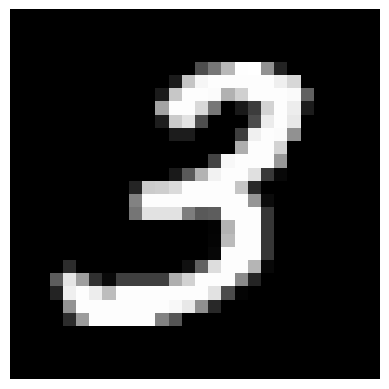

In [11]:
import matplotlib.pyplot as plt

x2 = train_ds.data[157]
plt.imshow(x2.reshape(28,28),cmap = 'gray')

plt.axis('off')

plt.show()

# -- 將資料轉為純黑白 --

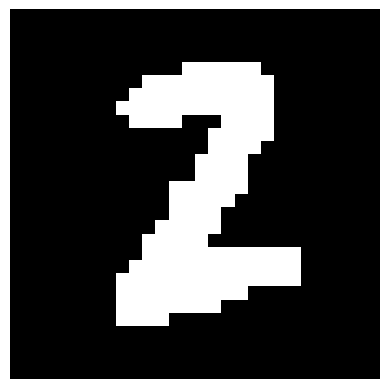

In [15]:
data = test_ds.data[256].clone()
data[data>0] = 1
data = data.numpy()

x2 = data
plt.imshow(x2.reshape(28,28),cmap = 'gray')

plt.axis('off')

plt.show()

# 3.架構模型

In [16]:
model = torch.nn.Sequential(
torch.nn.Flatten(),
torch.nn.Linear(28*28,256),
nn.Dropout(0.2),
torch.nn.Linear(256,10),
).to(device)

# -- 嘗試增加連結層並分析變化 --

In [180]:
model = torch.nn.Sequential(
torch.nn.Flatten(),
torch.nn.Linear(28*28,1024),
nn.Dropout(0.2),
torch.nn.Linear(1024,256),
nn.Dropout(0.2),
torch.nn.Linear(256,64),
nn.Dropout(0.2),
torch.nn.Linear(64,10),
).to(device)

# 4.訓練資料並計算損失函數

In [17]:
epochs = 5
lr = 0.1

train_loader = DataLoader(train_ds , batch_size =60)#不准

optimizer = torch.optim.Adadelta(model.parameters(),lr = lr)

criterion = nn.CrossEntropyLoss()

model.train()
loss_list = []
for epoch in range(1,epochs+1):
    for batch_idx,(data,target) in enumerate(train_loader):
        data,target = data.to(device),target.to(device)
        
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx/len(train_loader))

# -- 更改epoch及batch_size並分析變化 --

In [706]:
epochs = 5
lr = 0.1

train_loader = DataLoader(train_ds , batch_size = 600)#準

optimizer = torch.optim.Adadelta(model.parameters(),lr = lr)

criterion = nn.CrossEntropyLoss()

model.train()

loss_list = []
for epoch in range(1,epochs+1):
    for batch_idx,(data,target) in enumerate(train_loader):
        data,target = data.to(device),target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            loss_list.append(loss.item())
            batch = batch_idx * len(data)
            data_count = len(train_loader.dataset)
            percentage = (100. * batch_idx/len(train_loader))

# -- 輸出損失函數 --

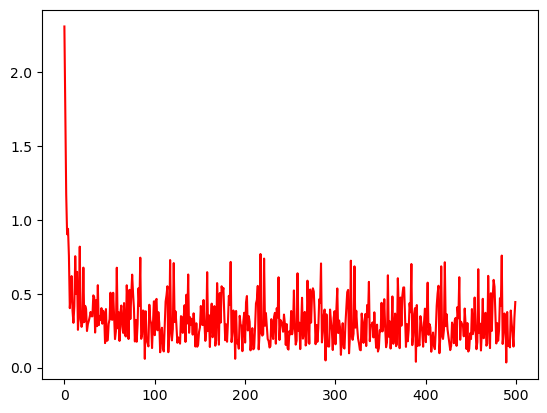

In [18]:
plt.plot(loss_list,'r')

In [19]:
test_loader = DataLoader(test_ds,shuffle = False,batch_size=BATCH_SIZE)

model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data,target in test_loader:
        data,target = data.to(device),target.to(device)
        output = model(data)
        
        test_loss += criterion(output,target).item()
        
        pred = output.argmax(dim=1,keepdim=True)
        
        correct += pred.eq(target.view_as(pred)).sum().item()
        
test_loss /= len(test_loader.dataset)

batch = batch_idx * len(data)
data_count = len(test_loader.dataset)
percentage = 100.*correct/data_count

# 5.輸出各數預測機率

In [26]:
predictions = []
with torch.no_grad():
    for i in range(20):
        data,target = test_ds[i][0],test_ds[i][1]
        data = data.reshape(1,*data.shape).to(device)
        output = torch.argmax(model(data),axis = -1)
        predictions.append(str(output.item()))

print(predictions)

['7', '2', '1', '0', '4', '1', '4', '9', '6', '9', '0', '6', '9', '0', '1', '8', '9', '7', '3', '4']


# -- 使輸出更可視化 --

In [32]:
import numpy as np

i = 75
data = test_ds[i][0]
data = data.reshape(1,*data.shape).to(device)

prediction = torch.softmax(model(data),dim=1)
print('0~9預測機率',np.around(prediction.cpu().detach().numpy()))
print('0~9預測機率',np.argmax(prediction.cpu().detach().numpy()))

0~9預測機率 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0~9預測機率 7


# 6.帶入自製手寫資料

# -- 查看資料形式並模擬 --

In [33]:
import numpy as np

i = 8
data = test_ds[i][0]
print('data:',data)
data = data.reshape(1,*data.shape).to(device)
prediction = torch.softmax(model(data),dim=1)
print('0~9預測機率',np.around(prediction.cpu().detach().numpy()))
print('0~9預測機率',np.argmax(prediction.cpu().detach().numpy()))

data: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0

In [14]:
print(prediction)
np.around(prediction.cpu().detach().numpy())

tensor([[0.0943, 0.0046, 0.0224, 0.0028, 0.0942, 0.0698, 0.5325, 0.0014, 0.1459,
         0.0319]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

# -- 偶然發現可以更改cmap參數改變輸出風格 --

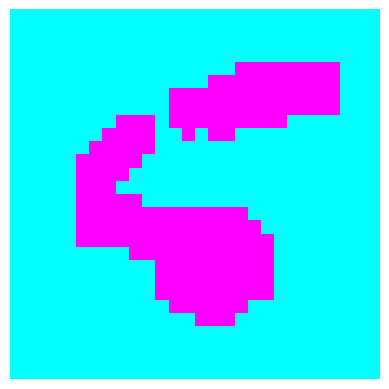

In [34]:
data = test_ds.data[8].clone()
data[data>0] = 1
data = data.numpy()

x2 = data
plt.imshow(x2.reshape(28,28),cmap="cool")

plt.axis('off')

plt.show()

# -- reshape圖像大小並模擬MNIST資料 --

In [39]:
from skimage import io 
from skimage.transform import resize
import numpy as np

pict = "C:\\Users\\User\\OneDrive\\桌面\\test.png"
image = io.imread(pict,as_gray = True)

image_resized = resize(image,(28,28),anti_aliasing=True)
x = image_resized.reshape(1,28,28)

x = torch.FloatTensor(1-x).to(device)

prediction = torch.softmax(model(x),dim=1)

a=0
for i in prediction.cpu().detach().numpy()[0]:
    print(a,":",i)
    a+=1
print('0~9預測機率 :',np.argmax(prediction.cpu().detach().numpy()))

0 : 0.026661243
1 : 0.058686838
2 : 0.09239619
3 : 0.04982836
4 : 0.15389326
5 : 0.09407753
6 : 0.075238094
7 : 0.0335176
8 : 0.3594412
9 : 0.056259736
0~9預測機率 : 8


# -- 模擬成功 ! 輸出案例 --

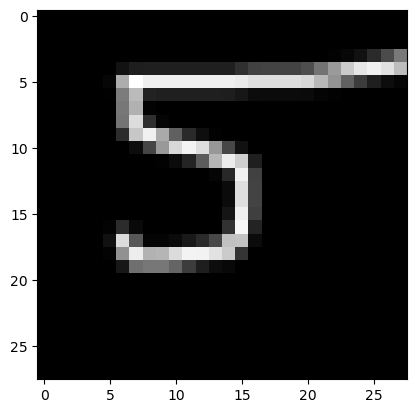

In [38]:
x = image_resized.reshape(1,28,28)
x = torch.FloatTensor(1-x)
plt.imshow(x.reshape(28,28),cmap = 'gray')


# -- 嘗試另一種資料轉換方法 (失敗) --

In [724]:
import numpy as np
import torch 

from PIL import Image

# 打開圖片並將其轉換為灰階模式
image = Image.open('C:\\Users\\User\\OneDrive\\桌面\\0~9\\0.png').convert('L')
image = image.resize((28,28))
l = list(image.getdata())
print(l)
print(len(l))

l = [[l]]

t1 = torch.tensor(l)
print(type(t1))

data = t1.reshape(1,*t1.shape).to(device)
print(data)
prediction = torch.softmax(model(data),dim=1)
print('0~9預測機率',np.around(prediction.cpu().detach().numpy()))
print('0~9預測機率',np.argmax(prediction.cpu().detach().numpy()))

[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 240, 248, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 252, 128, 147, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 220, 143, 149, 195, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 177, 182, 228, 140, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 250, 137, 239, 251, 135, 231, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 221, 141, 255, 255, 182, 179, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,

RuntimeError: expected scalar type Float but found Long